# Understanding Full Frame Images

## Learning goals

In this tutorial we will learn the following, 
 - What a TESS Full Frame Image (FFI) is. 
 - How to obtain an FFI from the [MAST archive](https://archive.stsci.edu/tess/) via *Lightkurve*.
 - How to cut out data around an object of interest in an FFI.
 - How to plot the cut FFI data.
 - How to access the metadata, and understand the files properties and units.

We will also show the user where they can find more details about TESS FFIs.

## What is a Full Frame Image?
The *TESS* telescope observes stars for long periods of time, just under a month per sector. Each sector is covered by 4 cameras.

A single FFI is the full set of all science and collateral pixels across all CCDs of a given camera. FFIs were taken every 30 minutes during science operations in the primary mission, and every 10 min in the extended. 

FFI data is provided in three types: uncalibrated, calibrated, and uncertainty. 

Uncalibrated FFI data is provided in one file with two Header/Data Units (HDUs): a primary header and the CCD image header and data. 

The calibrated image and its uncertainty are provided in a separate file with several HDUs: a primary header, the CCD calibrated image header and data, the CCD uncertainty image header and data, and the cosmic ray corrections binary table header and data. 

Cosmic Ray Mitigated (CRM) FFIs are the same as FFIs except they will are collected with the on-board cosmic ray mitigation enabled.

Sometimes an object of interest isn't in a TPF (see the [TPF tutorial](Target-Pixel-File-Tutorial.html)) but is in an FFI and as such the user may wish to create a cut out of the object in this FFI and work with this object only.

In this tutorial we'll cover the basics of working with FFIs. 

## Imports
This tutorial requires that you import *Lightkurve* only.

In [1]:
%matplotlib inline 
import lightkurve as lk

## Defining terms

- Target Pixel File (TPF): A file containing the original CCD pixel observations from which light curves are extracted. 

- Full Frame Image (FFI): A file containing the full set of all science and collateral pixels across all CCDs of a given camera.

- Cadence: The rate at which TESS photometric observations are stored. 

- Sector: One of TESS's 27 (to date) observing periods, approximately ~27 days in duration. 

## Downloading data
The *TESS* FFIs are stored on the [Mikulksi Archive for Space Telescopes](https://archive.stsci.edu/tess/) (MAST) archive.

First, let's create a TPF for an object of interest, let's choose Gaia object DR25290850609994130560. This object was observed in the *TESS* FFI data only. We'll use the [`search_tesscut`](https://docs.lightkurve.org/api/lightkurve.search.search_tesscut.html) function to download a cut out of the target in a chosen sector. You can determine which sectors the target was observed in using the [MAST TESS portal](https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html).


In [2]:
search_result = lk.search_tesscut('Gaia DR25290850609994130560')
print(search_result)

SearchResult containing 5 data products.

 #   observation   author         target_name         productFilename distance
--- -------------- ------ --------------------------- --------------- --------
  0  TESS Sector 4   MAST Gaia DR25290850609994130560         TESSCut      0.0
  1  TESS Sector 7   MAST Gaia DR25290850609994130560         TESSCut      0.0
  2  TESS Sector 8   MAST Gaia DR25290850609994130560         TESSCut      0.0
  3  TESS Sector 9   MAST Gaia DR25290850609994130560         TESSCut      0.0
  4 TESS Sector 10   MAST Gaia DR25290850609994130560         TESSCut      0.0


We can see that this object is detected in Sectors  4, 7, 8, 9, and 10. You can download data from just one sector and specify the cutout_size in number of TESS pixels on a side as an argument to `.download()`. The default is a meager 5 × 5 square. Let’s go with 10 pixels square.

In [3]:
search_result_s4 = lk.search_tesscut('Gaia DR25290850609994130560', sector=4)
tpfs_s4 = search_result_s4.download(cutout_size=10)
print(tpfs_s4)

TessTargetPixelFile(TICID: Gaia DR25290850609994130560)


The above code has created a variable named `tpfs_s4` which is a Python object of type `TessTargetPixelFile`
This can then be treated and examined the same way as in the previous [Target Pixel File tutorial](Target-Pixel-File-Tutorial.html), for example lets plot the object.

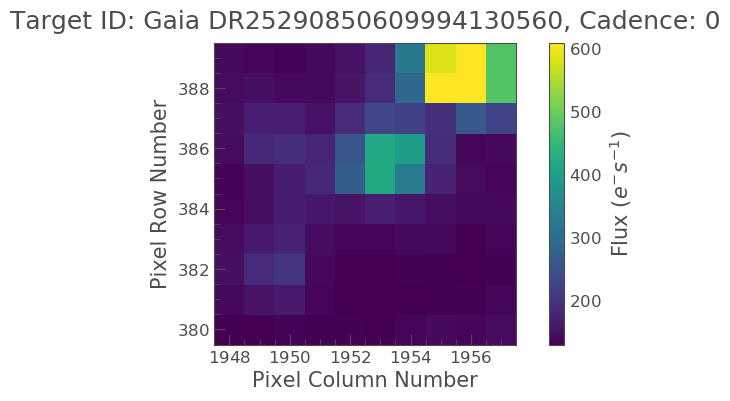

In [4]:
%matplotlib inline
tpfs_s4.plot();

Great we now see our object of interest and the surrounding region. As indicated in the previous [Target Pixel File tutorial](Target-Pixel-File-Tutorial.html), we can examine the header of this file via, 

In [5]:
tpfs_s4.hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2066 / length of dimension 1                          
NAXIS2  =                 1060 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   12 / number of table fields                         
TTYPE1  = 'TIME    '           / column name                                    
TFORM1  = 'D       '           / column format                                  
TUNIT1  = 'BJD - 2457000, days' / unit                                          
TDISP1  = 'D14.7   '           / display format                                 
TTYPE2  = 'TIMECORR'        

We can also examine specific things like the flux or time via, 

In [6]:
tpfs_s4.flux

<Quantity [[[ 129.99297,  128.63951,  132.87094, ...,  139.99612,
              137.95688,  142.58392],
            [ 138.6435 ,  153.85022,  161.18605, ...,  132.13853,
              131.88116,  136.26653],
            [ 147.42535,  185.44145,  202.03874, ...,  131.27419,
              129.55354,  132.28387],
            ...,
            [ 148.45624,  168.75594,  169.70703, ...,  193.291  ,
              262.4334 ,  225.49281],
            [ 143.34943,  148.85297,  140.9907 , ...,  632.6027 ,
             1230.0093 ,  481.08664],
            [ 138.4722 ,  136.3645 ,  133.1722 , ...,  582.95276,
             1186.0709 ,  478.3571 ]],

           [[ 129.82346,  128.34328,  132.64188, ...,  139.19876,
              137.08186,  142.32404],
            [ 139.79184,  152.9795 ,  161.24356, ...,  132.91368,
              131.2858 ,  136.80386],
            [ 147.51363,  185.70856,  202.45325, ...,  131.01465,
              129.473  ,  132.8133 ],
            ...,
            [ 147.99286,  16